# Preprocessing

This notebook contains code to read in data from the Muse and break it into labelled chunks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.io

In [2]:
%matplotlib inline

## Importing data

In [3]:
# def loadData(filename='...')
filename = 'data/subj1-run1b.mat'
# alldata = pd.read_csv("...")

In [4]:
data = scipy.io.loadmat(filename)
data.keys()

['mytraindata', '__version__', '__header__', '__globals__']

In [5]:
braindata = data['mytraindata']

In [6]:
s = braindata[0,0]

In [7]:
s.dtype

dtype([('setname', 'O'), ('filename', 'O'), ('filepath', 'O'), ('subject', 'O'), ('group', 'O'), ('condition', 'O'), ('session', 'O'), ('comments', 'O'), ('nbchan', 'O'), ('trials', 'O'), ('pnts', 'O'), ('srate', 'O'), ('xmin', 'O'), ('xmax', 'O'), ('times', 'O'), ('data', 'O'), ('icaact', 'O'), ('icawinv', 'O'), ('icasphere', 'O'), ('icaweights', 'O'), ('icachansind', 'O'), ('chanlocs', 'O'), ('urchanlocs', 'O'), ('chaninfo', 'O'), ('ref', 'O'), ('event', 'O'), ('urevent', 'O'), ('eventdescription', 'O'), ('epoch', 'O'), ('epochdescription', 'O'), ('reject', 'O'), ('stats', 'O'), ('specdata', 'O'), ('specicaact', 'O'), ('splinefile', 'O'), ('icasplinefile', 'O'), ('dipfit', 'O'), ('history', 'O'), ('saved', 'O'), ('etc', 'O'), ('stamps', 'O')])

In [8]:
s['srate']

array([[220]], dtype=uint8)

In [9]:
labels = [x[0] for x in s['chanlocs']['labels'][0]]
print labels

[u'TP9', u'FP1', u'FP2', u'TP10', u'n/a', u'n/a']


In [10]:
print s['filepath']
print s['pnts']
print s['event']

[u'C:\\Users\\gsteelman\\Desktop\\Neurotech']
[[478880]]
[[([u'100'], [[2442]], [[1]]) ([u'100'], [[2446.000632762909]], [[1]])
  ([u'149'], [[23617.305362850428]], [[1]])
  ([u'12'], [[42981.47397580743]], [[1]])
  ([u'151'], [[55614.90879303217]], [[1]])
  ([u'12'], [[75949.85739275813]], [[1]])
  ([u'149'], [[89237.90749371052]], [[1]])
  ([u'12'], [[108918.29084154963]], [[1]])
  ([u'151'], [[122597.24566075206]], [[1]])
  ([u'151'], [[141928.8902581334]], [[1]])
  ([u'149'], [[155239.61553436518]], [[1]])
  ([u'12'], [[174943.11836385727]], [[1]])
  ([u'151'], [[188144.30569067597]], [[1]])
  ([u'12'], [[207890.99412560463]], [[1]])
  ([u'149'], [[221326.23233005404]], [[1]])
  ([u'12'], [[240961.71688118577]], [[1]])
  ([u'151'], [[254127.76232475042]], [[1]])
  ([u'12'], [[272641.0989597142]], [[1]])
  ([u'149'], [[287343.68319153786]], [[1]])
  ([u'12'], [[305449.58812204003]], [[1]])
  ([u'149'], [[320153.3358784616]], [[1]])
  ([u'12'], [[337274.58083975315]], [[1]])
  ([u'15

In [11]:
for typ, time, _ in s['event'][0]:
    typ = typ[0]
    time = time[0,0]
    print typ, time

100 2442
100 2446.00063276
149 23617.3053629
12 42981.4739758
151 55614.908793
12 75949.8573928
149 89237.9074937
12 108918.290842
151 122597.245661
151 141928.890258
149 155239.615534
12 174943.118364
151 188144.305691
12 207890.994126
149 221326.23233
12 240961.716881
151 254127.762325
12 272641.09896
149 287343.683192
12 305449.588122
149 320153.335878
12 337274.58084
151 353253.180221
12 372964.069899
149 386161.572913
12 405919.417103
151 418665.788761
12 438943.473453
149 452219.277364
12 471921.345644
0 478185.704627
200 478253.535885


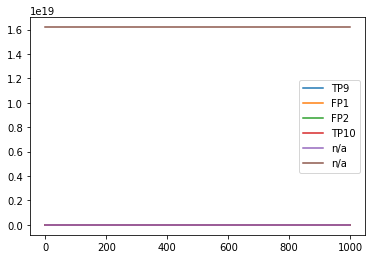

In [12]:
plt.plot(np.transpose(s['data'])[1:10000:10,:])
plt.legend(labels)

In [13]:
s['chanlocs']['labels']

array([[array([u'TP9'], 
      dtype='<U3'),
        array([u'FP1'], 
      dtype='<U3'),
        array([u'FP2'], 
      dtype='<U3'),
        array([u'TP10'], 
      dtype='<U4'),
        array([u'n/a'], 
      dtype='<U3'),
        array([u'n/a'], 
      dtype='<U3')]], dtype=object)

In [14]:
df = pd.DataFrame(np.transpose(s['data']), columns=labels,)

In [15]:
df.tail()

,TP9,FP1,FP2,TP10,n/a,n/a
478875,379.990448,583.968018,807.685364,440.854736,3.129684e-37,1.618617e+19
478876,379.990448,478.689270,597.127869,388.215363,3.129684e-37,1.618617e+19
478877,485.269196,689.246765,755.045959,493.494110,3.129684e-37,1.618617e+19
478878,379.990448,689.246765,755.045959,440.854736,3.129684e-37,1.618617e+19
478879,485.269196,689.246765,860.324707,598.772827,3.129684e-37,1.618617e+19
